In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
import pandas as pd

In [ ]:
df = pd.read_csv('Iris Dataset.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X_train = df.to_numpy()

In [ ]:
true_labels = df['Species']

In [ ]:
true_labels = true_labels.to_numpy()

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
for i in range(len(true_labels)):
  if(true_labels[i] == 'Iris-setosa'):
    true_labels[i] = 0
  elif(true_labels[i] == 'Iris-versicolor'):
    true_labels[i] = 1
  else:
    true_labels[i] = 2

In [ ]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [ ]:
df = df.drop(['Species'],axis = 1)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
X_train = df.to_numpy()

#K-Means Clustering
# Initialize centroids,a random datapoint is selected as the first centroid,
# then the rest are initialized w/ probabilities proportional to their distances to the first
# Calculate distances from points to the centroids
# Normalize the distances
# Choose remaining points based on their distances
# Iterate, adjusting centroids until converged or until passed max_iter
# Sort each datapoint, assigning to nearest centroid
# Push current centroids to previous, reassign centroids as mean of the points belonging to them
# Catch any np.nans, resulting from a centroid having no points




In [ ]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize centroids,a random datapoint is selected as the first centroid,
        self.centroids = [random.choice(X_train)]
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

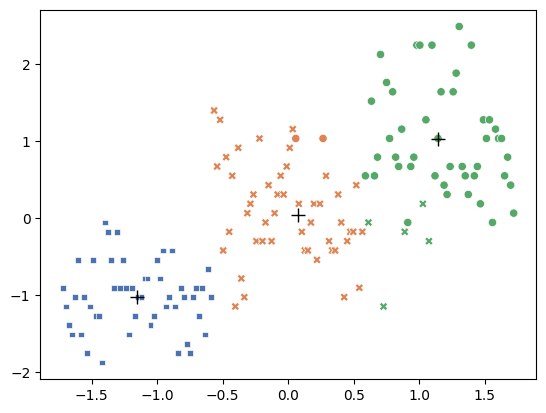

In [ ]:
# Create a dataset of 2D distributions
centers = 3
#X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
#Since there are a total of 5 labels and all of them cannot be plotted at once,we use the first two variables,Sepal length and Sepal width
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _,_,_,_ in kmeans.centroids],
         [y for _, y,_,_,_ in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [ ]:
kmeans_centroids = kmeans.centroids

In [ ]:
kmeans_centroids #Ignoring the first element of every column,the remaining 4 elements of each row represents the coordinates of the centroids

[array([ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889]),
 array([ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]),
 array([-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862])]

#Principal Component Analysis (PCA)
#Remove the 'Species' column as mentioned.
#Standardize the data by subtracting the mean and dividing by the S.D
#Compute the covariance matrix of the standardized data
#Perform PCA on the standardized data
#Compute the eigenvalues and eigenvectors of the covariance matrix
#Sort the eigenvalues and eigenvectors in descending order
#Using these eigenvectors to Project the data onto the first three eigenvectors
# Load the Iris dataset
# Remove the 'Species' column
# Perform PCA and get the projected data and eigenvalues




In [ ]:
def remove_species_column(data):
    #Remove the 'Species' column as mentioned.
    species = data['Species']
    data = data.drop('Species', axis=1)
    return data, species

def standardize_data(data):
    #Standardize the data by subtracting the mean and dividing by the S.D
    standardized_data = (data - data.mean()) / data.std()
    return standardized_data

def compute_covariance_matrix(data):
    #Compute the covariance matrix of the standardized data
    covariance_matrix = np.cov(data.T)
    return covariance_matrix

def perform_pca(data):
    #Perform PCA on the standardized data
    standardized_data = standardize_data(data)
    covariance_matrix = compute_covariance_matrix(standardized_data)

    #Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    #Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #Using these eigenvectors to Project the data onto the first three eigenvectors
    projected_data = standardized_data.dot(eigenvectors[:, :3])

    return projected_data, eigenvalues[:3]

# Load the Iris dataset
data = pd.read_csv('Iris Dataset.csv')

# Remove the 'Species' column
data, species = remove_species_column(data)

# Perform PCA and get the projected data and eigenvalues
projected_data, eigenvalues = perform_pca(data)

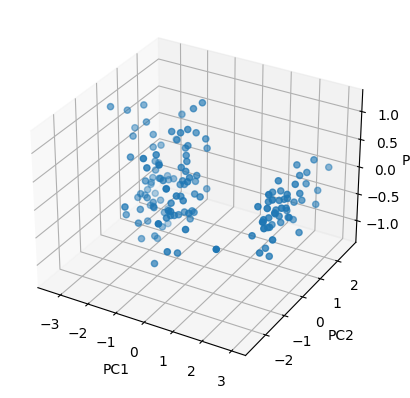

Eigenvalues: [3.7352665  0.92176284 0.23413122]


In [ ]:
# Plot the data in the first three eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data.iloc[:, 0], projected_data.iloc[:, 1], projected_data.iloc[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Print the corresponding eigenvalues
print('Eigenvalues:', eigenvalues)